In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from matplotlib.patches import Polygon

import balloon
import random
from myolo.config import Config as config
from mrcnn import visualize
from mrcnn import utils
from mrcnn.model import log
import mrcnn.model as modellib
from mrcnn.visualize import display_images

%matplotlib inline

Using TensorFlow backend.


In [16]:
ROOT_DIR = '/Users/jianingsun/Documents/Research/Nov/mask_food'

In [17]:
config = balloon.BalloonConfig()
BALLOON_DIR = os.path.join(ROOT_DIR, "datasets/balloon")

In [18]:
BALLOON_DIR

'/Users/jianingsun/Documents/Research/Nov/mask_food/datasets/balloon'

In [19]:
dataset = balloon.BalloonDataset()
dataset.load_balloon(BALLOON_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset.image_ids)))
print("Class Count: {}".format(dataset.num_classes))
for i, info in enumerate(dataset.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 61
Class Count: 2
  0. BG                                                
  1. balloon                                           


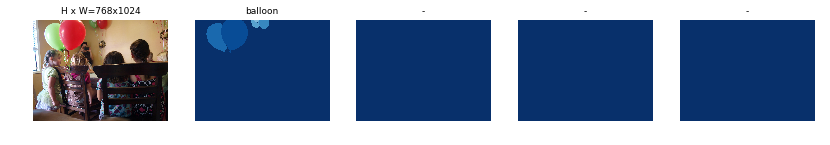

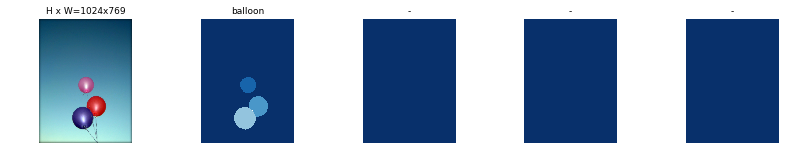

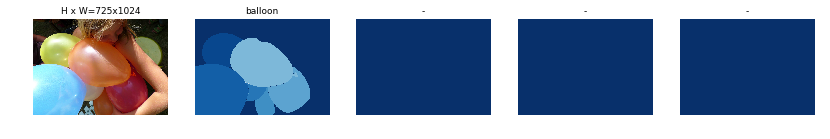

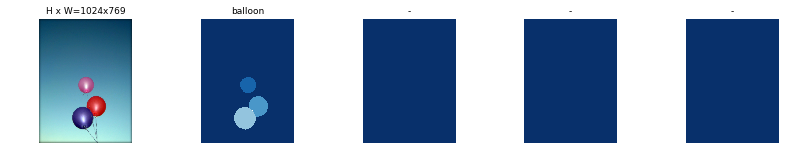

In [20]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset.load_image(image_id)
    mask, class_ids = dataset.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset.class_names)

[[  1 599 299 845]]
image_id  11 /Users/jianingsun/Documents/Research/Nov/mask_food/datasets/balloon/train/14321263043_b76ef054d3_k.jpg
image                    shape: (1356, 2048, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1356, 2048, 1)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:    1.00000  max:  845.00000  int32


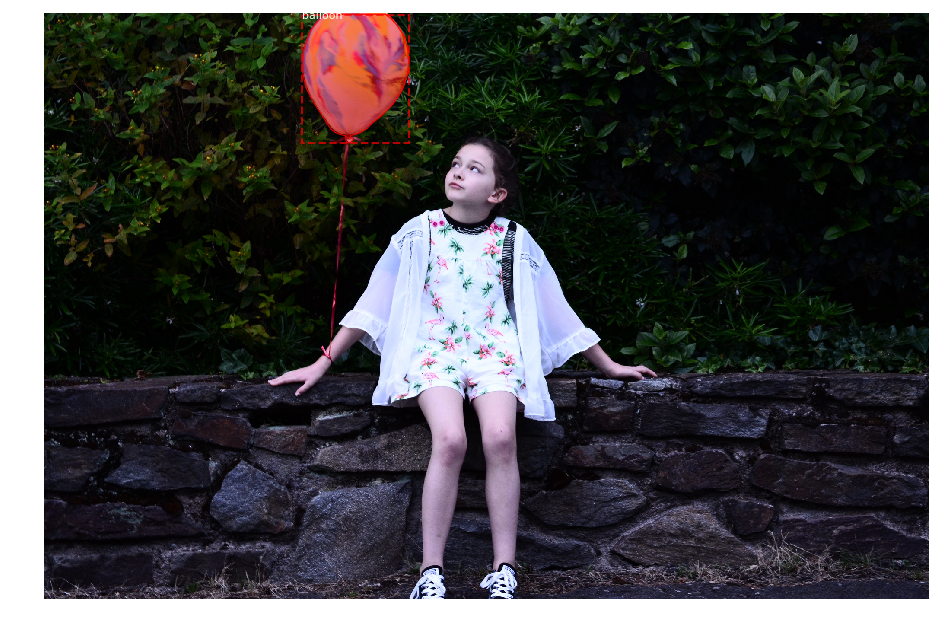

In [21]:
# Load random image and mask.
image_id = random.choice(dataset.image_ids)
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)
print(bbox)
# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

image_id:  42 /Users/jianingsun/Documents/Research/Nov/mask_food/datasets/balloon/train/2385899600_94b68350af_b.jpg
Original shape:  (576, 1024, 3)
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
mask                     shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:  272.00000  max:  985.00000  int32


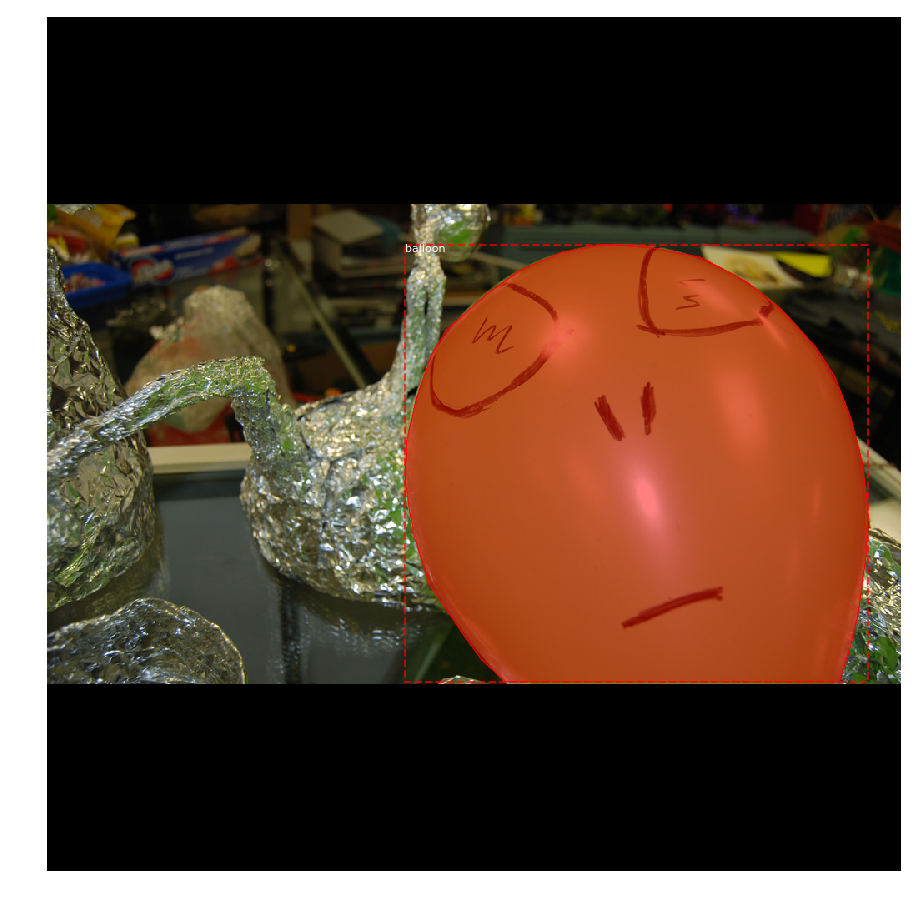

In [22]:
# Load random image and mask.
image_id = np.random.choice(dataset.image_ids, 1)[0]
image = dataset.load_image(image_id)
mask, class_ids = dataset.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

In [31]:
with open('ballon_boxes', 'w') as file:
    for image_id in (dataset.image_ids):
        print(image_id)
        image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
            dataset, config, image_id, use_mini_mask=False)
        print(bbox)
        for i in range(0, len(bbox)):
            file.write(str(bbox[i]))
file.close()

0
[[438 497 711 722]]
1
[[229  68 653 406]]
2
[[244 418 461 588]]
3
[[183 395 406 563]
 [229 526 403 634]
 [310 539 532 708]
 [402 411 622 581]
 [496 531 682 689]
 [610 428 787 538]
 [561 323 748 498]
 [464 306 567 422]
 [319 282 524 448]
 [262 359 415 467]]
4
[[226 374 678 712]
 [157 519 527 793]
 [363 639 677 842]
 [377 799 635 952]
 [363 199 573 364]
 [527 245 742 410]
 [593 106 819 284]]
5
[[219  38 652 469]]
6
[[113 587 452 922]]
7
[[363 271 463 375]
 [357 374 468 470]
 [390 366 433 381]
 [433 432 541 527]
 [433 330 529 432]
 [496 324 568 437]]
8
[[625 237 866 438]]
9
[[194 603 291 707]
 [270 561 361 655]
 [204 498 317 587]]
10
[[129 361 291 482]
 [242 389 331 476]
 [218 265 343 414]]
11
[[174 300 323 423]]
12
[[126  10 585 516]]
13
[[377 540 465 607]
 [383 474 470 549]]
14
[[420 109 792 514]]
15
[[107 673 428 966]
 [385 698 684 997]]
16
[[313 483 822 893]
 [ 59 584 396 937]
 [165 240 589 596]
 [433  75 967 493]
 [629 379 936 592]]
17
[[159 626 332 826]
 [308 518 484 627]
 [158   

image                    shape: (224, 224, 3)         min:    0.00000  max:  254.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 2048.00000  float64
class_ids                shape: (1,)                  min:    1.00000  max:    1.00000  int32
bbox                     shape: (1, 4)                min:   52.00000  max:  189.00000  int32
mask                     shape: (224, 224, 1)         min:    0.00000  max:    1.00000  bool


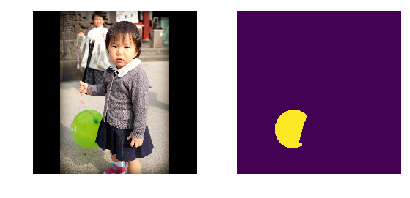

In [35]:
image_id = np.random.choice(dataset.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=False)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)

display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

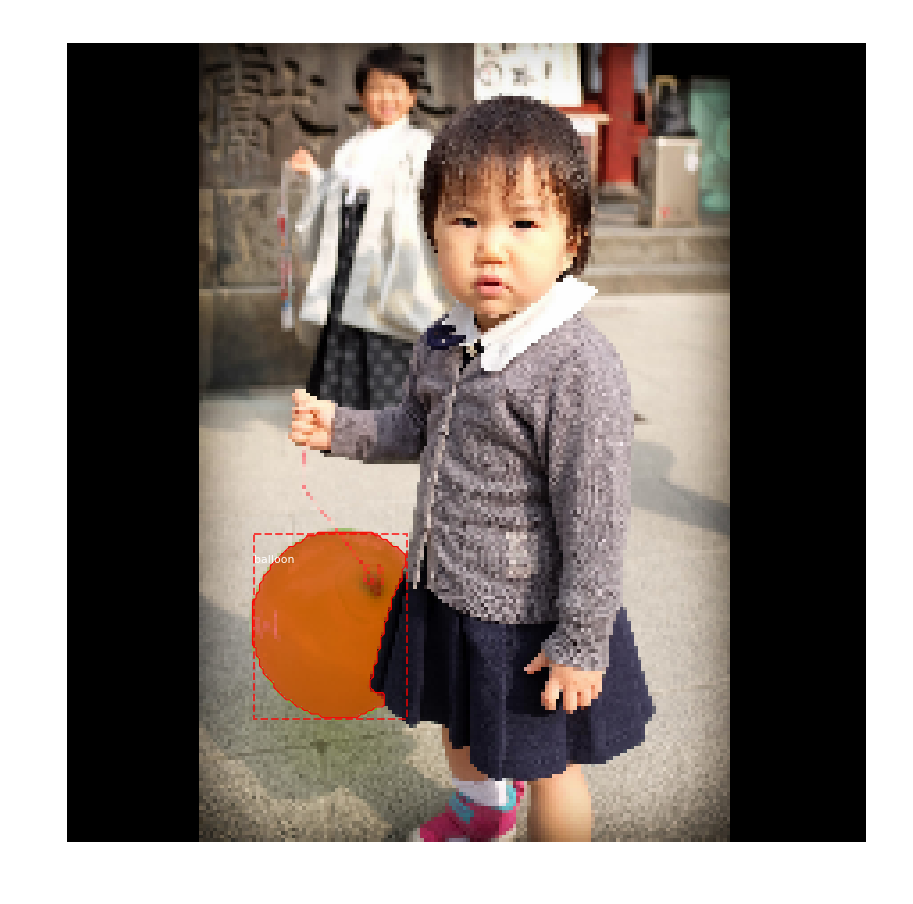

In [36]:
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)

mask                     shape: (56, 56, 1)           min:    0.00000  max:    1.00000  bool


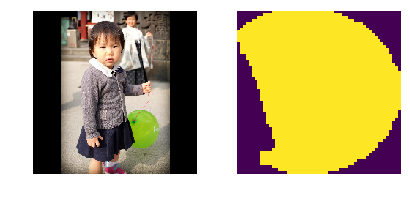

In [37]:
# Add augmentation and mask resizing.
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, augment=True, use_mini_mask=True)
log("mask", mask)
display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

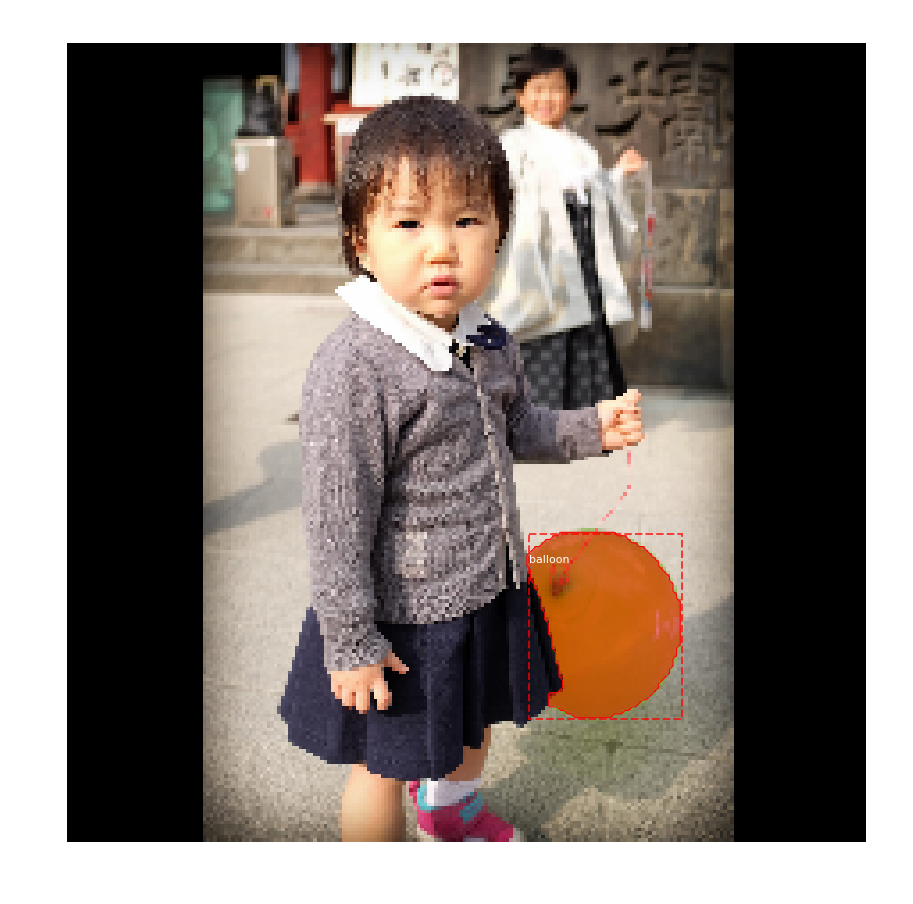

In [38]:
mask = utils.expand_mask(bbox, mask, image.shape)
visualize.display_instances(image, bbox, mask, class_ids, dataset.class_names)